In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [4]:
df_explode = df.explode('job_skills')

<Axes: xlabel='job_skills'>

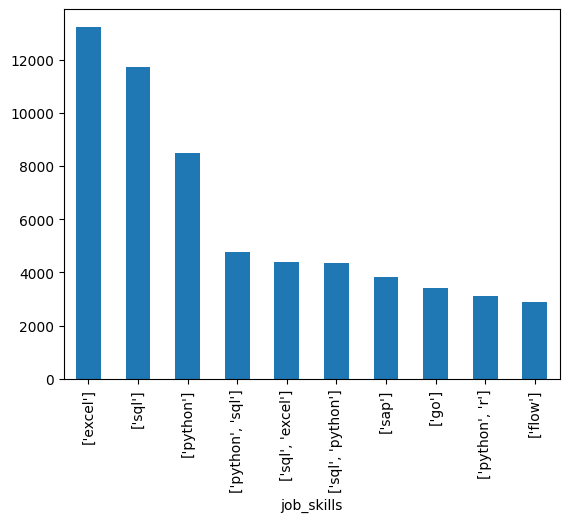

In [5]:
df_explode['job_skills'].value_counts().head(10).plot(kind='bar')

In [11]:
skills_count = df_explode.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills                                                  job_title_short          
['airflow', 'confluence']                                   Data Engineer                 1
['airflow', 'datarobot', 'docker', 'kubernetes']            Senior Data Engineer          1
['airflow', 'docker', 'gitlab', 'kubernetes']               Machine Learning Engineer     1
['airflow', 'docker', 'kubernetes', 'terraform', 'gitlab']  Data Engineer                 1
['airflow', 'docker', 'kubernetes']                         Data Analyst                  1
                                                                                         ..
['zoom']                                                    Data Engineer                10
                                                            Data Scientist               43
                                                            Senior Data Analyst           2
                                                            Senior Data Scientist     

In [13]:
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,"['airflow', 'confluence']",Data Engineer,1
1,"['airflow', 'datarobot', 'docker', 'kubernetes']",Senior Data Engineer,1
2,"['airflow', 'docker', 'gitlab', 'kubernetes']",Machine Learning Engineer,1
3,"['airflow', 'docker', 'kubernetes', 'terraform...",Data Engineer,1
4,"['airflow', 'docker', 'kubernetes']",Data Analyst,1
...,...,...,...
215215,['zoom'],Data Engineer,10
215216,['zoom'],Data Scientist,43
215217,['zoom'],Senior Data Analyst,2
215218,['zoom'],Senior Data Scientist,2


In [15]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
116092,['python'],Data Scientist,4659
146457,"['sql', 'excel']",Data Analyst,3020
16108,['excel'],Business Analyst,2443
...,...,...,...
215206,['xamarin'],Software Engineer,1
215207,['yarn'],Data Engineer,1
215209,"['zoom', 'microsoft teams', 'webex']",Data Analyst,1
215210,"['zoom', 'microsoft teams']",Business Analyst,1


In [16]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
16110,['excel'],Data Analyst,8095
208186,['sql'],Data Analyst,4997
146457,"['sql', 'excel']",Data Analyst,3020
126028,['sap'],Data Analyst,1718
189359,"['sql', 'python']",Data Analyst,1593
49089,['power bi'],Data Analyst,1577
206258,"['sql', 'tableau']",Data Analyst,1399
24460,['go'],Data Analyst,1354
210399,['tableau'],Data Analyst,1202
160939,"['sql', 'power bi']",Data Analyst,1003


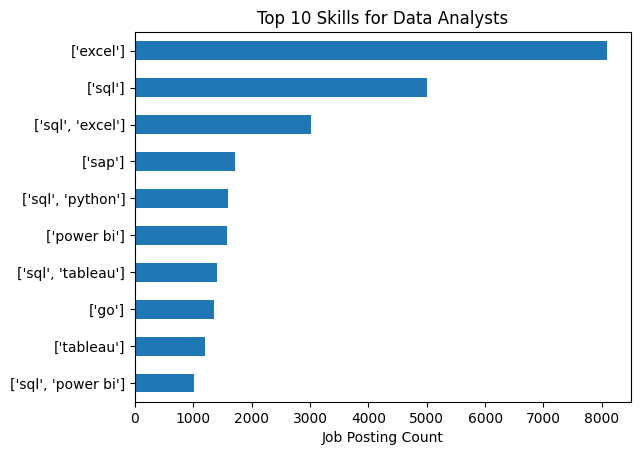

In [17]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()